In [1]:
from tqdm.notebook import trange, tqdm
from collections import defaultdict

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import datetime

import seaborn as sns
# sns.set_theme(style="whitegrid") # AttributeError: module 'seaborn' has no attribute 'set_theme'
from nltk.corpus import stopwords 
import string
stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

pd.set_option('display.max_rows', 20)
import config
import os

In [2]:
vid_cats = pd.read_json(os.path.join(config.YOUTUBE_DATA_PATH, 'US_category_id.json'))
vids = pd.read_csv('vids.csv')

In [20]:
valid = [1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,42]
for i in valid:
    for item in vid_cats['items']:
        if item['id'] == str(i):
            print(f'{i} -> {item["snippet"]["title"]}')
            break


1 -> Film & Animation
2 -> Autos & Vehicles
10 -> Music
15 -> Pets & Animals
17 -> Sports
19 -> Travel & Events
20 -> Gaming
22 -> People & Blogs
23 -> Comedy
24 -> Entertainment
25 -> News & Politics
26 -> Howto & Style
27 -> Education
28 -> Science & Technology
29 -> Nonprofits & Activism
42 -> Shorts


In [3]:
vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,30.559227,17.47622,20.829126,0.0,33.63984
1,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,2188590.0,88099.0,7150.0,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,30.559227,17.47622,20.829126,0.0,33.63984
2,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,2325233.0,91111.0,7543.0,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,30.559227,17.47622,20.829126,0.0,33.63984
3,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,2400741.0,92831.0,7687.0,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,30.559227,17.47622,20.829126,0.0,33.63984
4,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,2468267.0,94303.0,7802.0,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,30.559227,17.47622,20.829126,0.0,33.63984


**Analysis Plots**

In [4]:
cat_id_to_name = {}
for cat in vid_cats['items']:
    cat_id_to_name[int(cat['id'])] = cat['snippet']['title']
vids.insert(len(vids.columns), 'category', vids['category_id'].map(cat_id_to_name))

In [5]:
vids.category

0        People & Blogs
1        People & Blogs
2        People & Blogs
3        People & Blogs
4        People & Blogs
              ...      
41410     Howto & Style
41411            Sports
41412     Entertainment
41413     Howto & Style
41414     Entertainment
Name: category, Length: 41415, dtype: object

change category_id to category


Text(0.5, 1.0, 'Number of Videos per Category')

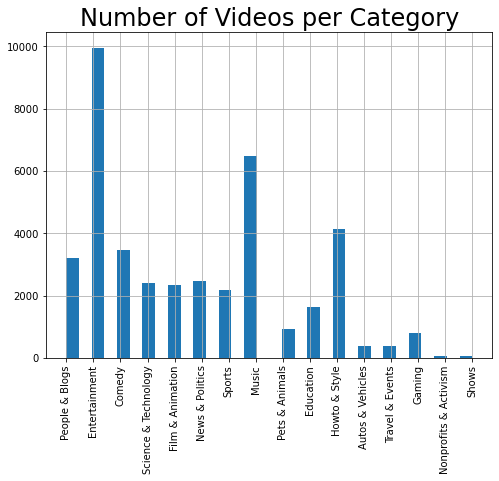

In [6]:
print('change category_id to category')
vids.category.hist(bins=len(cat_id_to_name), figsize=(8, 6)) 
plt.xticks(rotation='vertical')
plt.title('Number of Videos per Category', fontsize=24)

Text(0.5, 0.98, 'Views per Category')

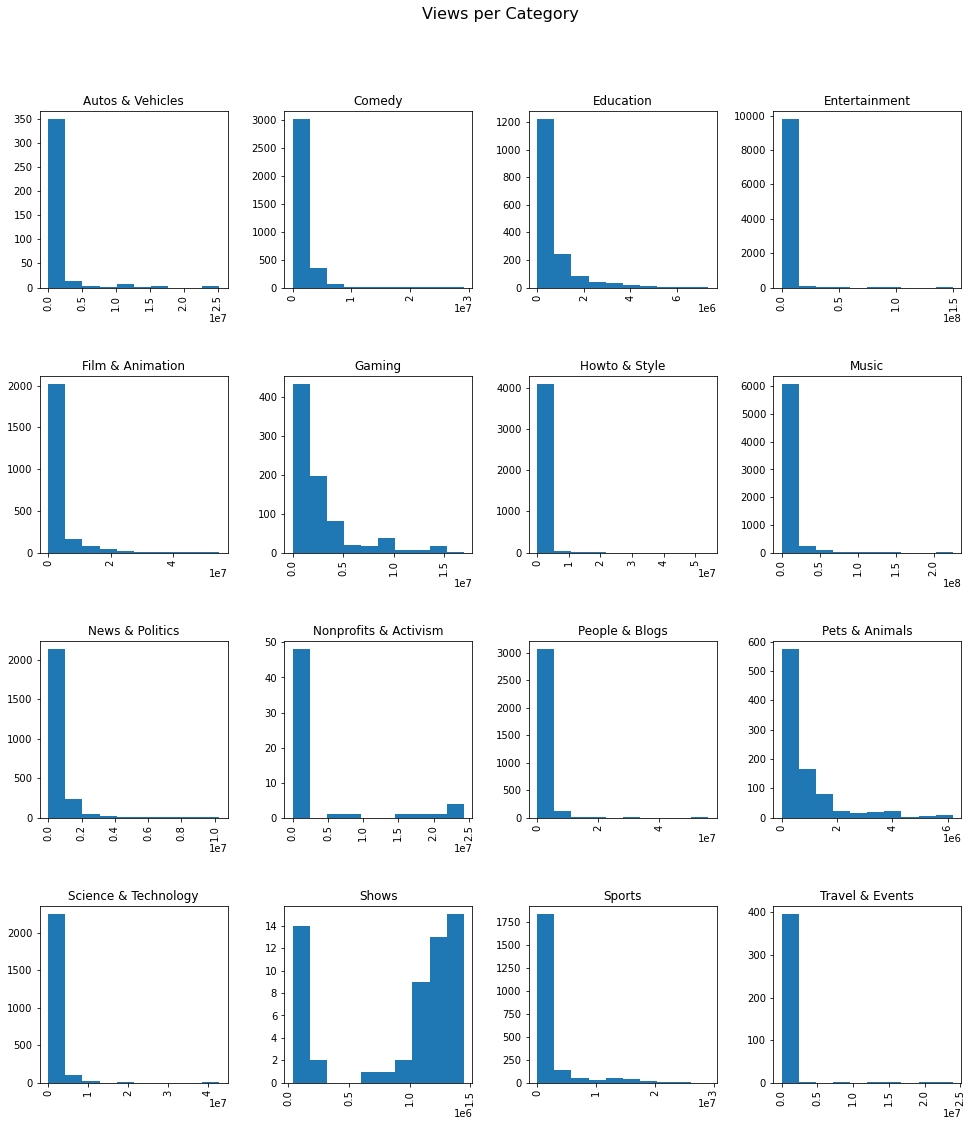

In [7]:
vids.views.hist(by=vids.category, figsize = (16,18))
plt.suptitle('Views per Category', fontsize=16)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Autos & Vehicles'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Film & Animation'),
  Text(6, 0, 'Gaming'),
  Text(7, 0, 'Howto & Style'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'People & Blogs'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Travel & Events')])

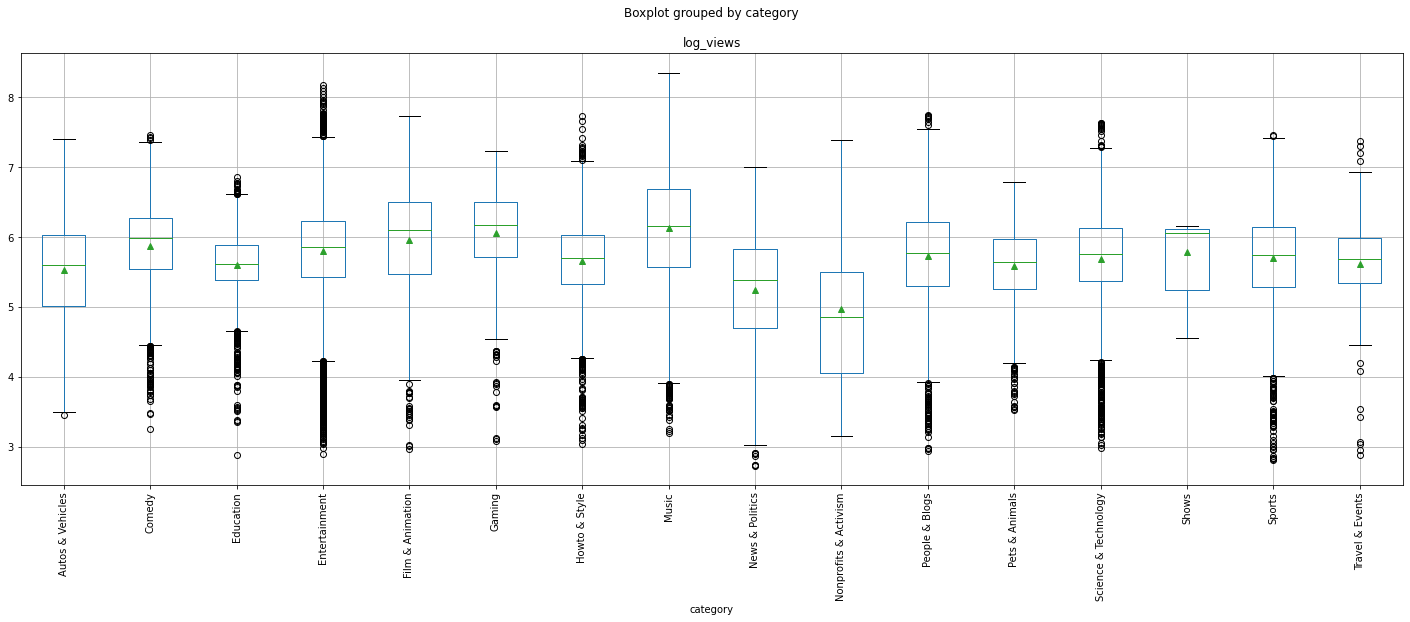

In [8]:
vids.insert(len(vids.columns), 'log_views', np.log10(vids.views))
vids.boxplot(column='log_views', by='category', figsize=(24, 8), showmeans=True)
plt.xticks(rotation='vertical')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'log_likes'}, xlabel='category'>

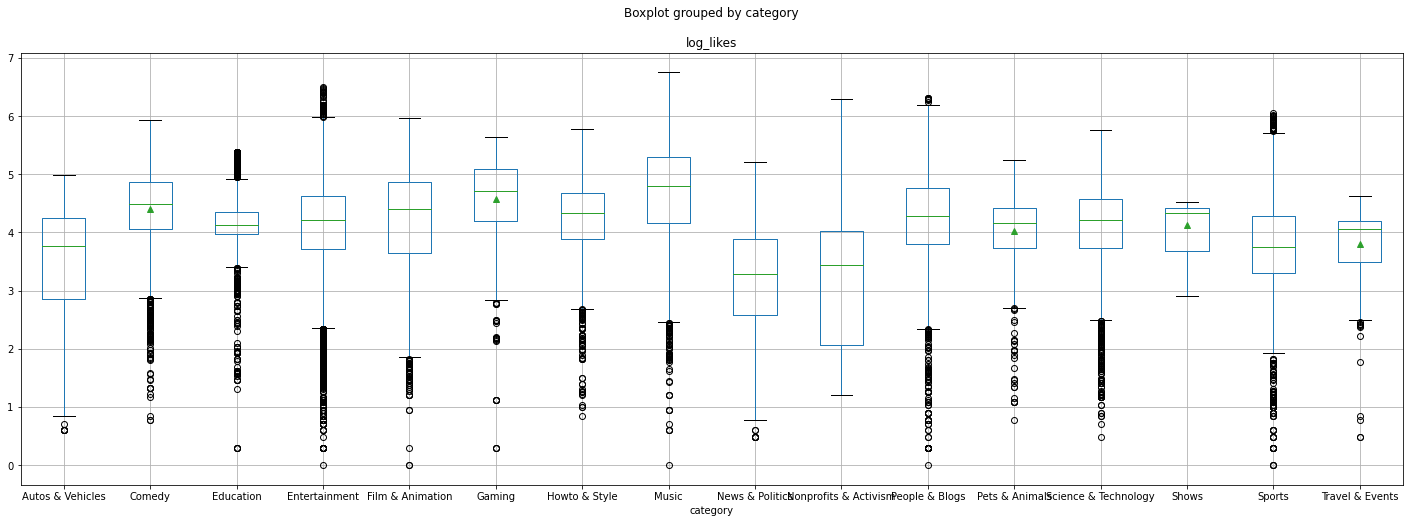

In [9]:
vids.insert(len(vids.columns), 'log_likes', np.log10(vids.likes))
vids.boxplot(column='log_likes', by='category', figsize=(24, 8), showmeans=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'log_dislikes'}, xlabel='category'>

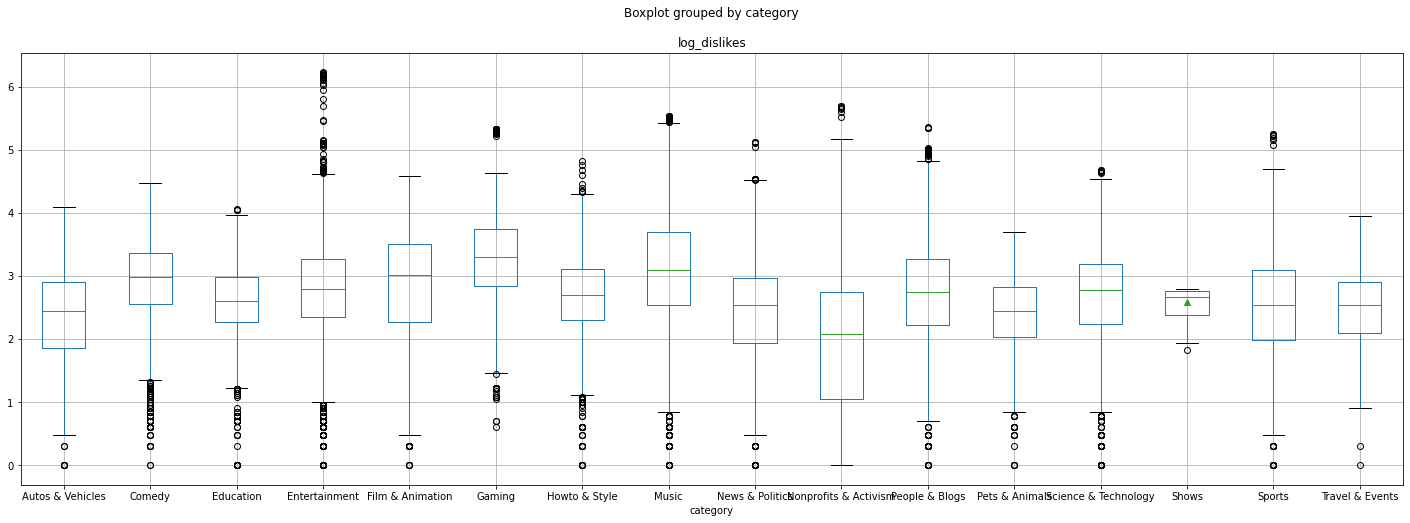

In [10]:
vids.insert(len(vids.columns), 'log_dislikes', np.log10(vids.dislikes))
vids.boxplot(column='log_dislikes', by='category', figsize=(24, 8), showmeans=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'log_comment_count'}, xlabel='category'>

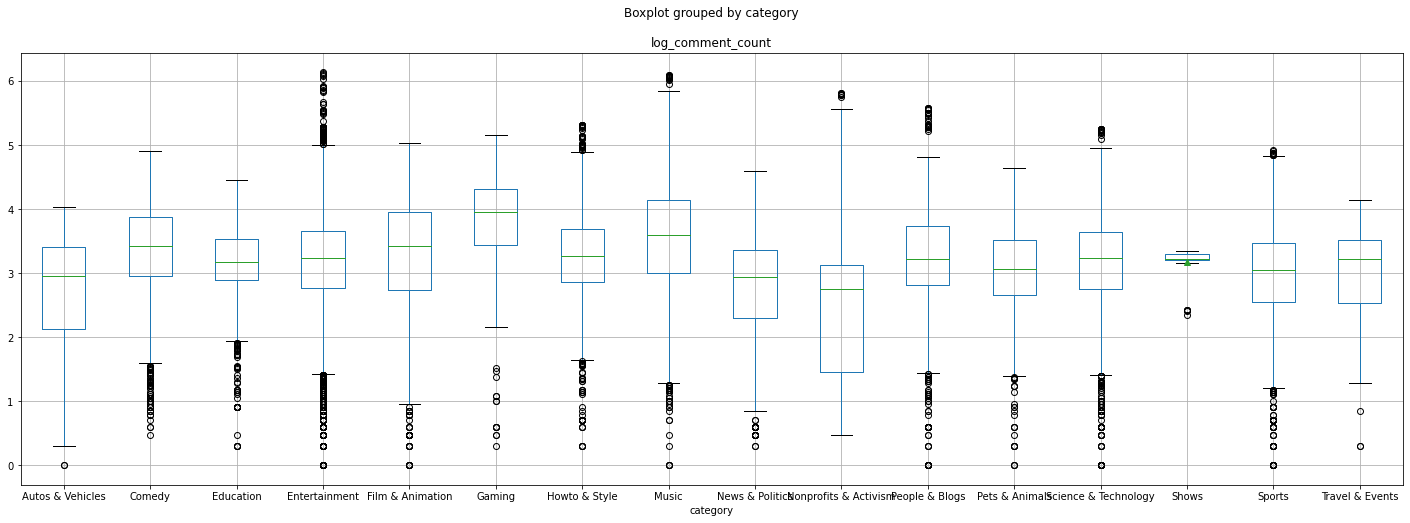

In [11]:
vids.insert(len(vids.columns), 'log_comment_count', np.log10(vids.comment_count))
vids.boxplot(column='log_comment_count', by='category', figsize=(24, 8), showmeans=True)

Text(0, 0.5, '# Videos')

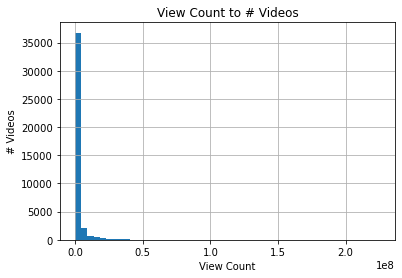

In [12]:
vids.views.hist(bins=50)
plt.title('View Count to # Videos')
plt.xlabel('View Count')
plt.ylabel('# Videos')

Text(0, 0.5, '# Videos')

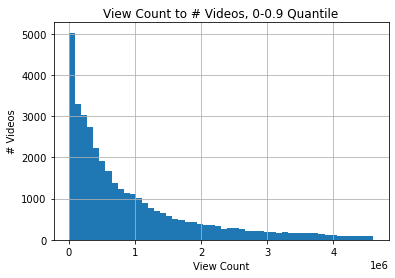

In [28]:
removed_outliers = vids.views.between(vids.views.quantile(0.00), vids.views.quantile(0.9))
reduced_df = vids[removed_outliers]
reduced_df.views.hist(bins=50)
plt.title('View Count to # Videos, 0-0.9 Quantile')
plt.xlabel('View Count')
plt.ylabel('# Videos')

In [31]:
len(reduced_df), len(vids)

(36854, 41415)

In [13]:
print(f'min: {vids.views.min()}')
print(f'mean: {vids.views.mean()}')
print(f'median: {vids.views.median()}')
print(f'std: {vids.views.std()}')
print(f'max: {vids.views.max()}')

min: 549.0
mean: 2360784.6382573447
median: 681861.0
std: 7394113.759703948
max: 225211923.0


Text(0, 0.5, 'View Count')

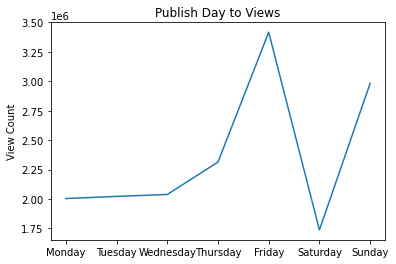

In [14]:
def publish_time_to_day(day_string):
    split = day_string.split('T')[0].split('-')
    return datetime.datetime(int(split[0]), int(split[1]), int(split[2])).strftime('%A')

vids = vids.dropna()
vids['publish_day'] = vids.publish_time.apply(publish_time_to_day)
day_to_views = vids.groupby('publish_day')['views'].agg(np.mean)
X = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots()
ax.plot(X, [day_to_views[x] for x in X])
ax.set_title('Publish Day to Views')
ax.set_ylabel('View Count')

**Word Clouds**

The first section takes about three minutes to run.

In [15]:
tag_to_views = defaultdict(lambda: 0)
tag_freq = defaultdict(lambda: 0)
title_freq = defaultdict(lambda: 0)
title_to_views = defaultdict(lambda: 0)

for i, vid_tags in tqdm(enumerate(vids['tags'].values)):
    for vid_tag in vid_tags.split('|'):
        tag_freq[vid_tag] += 1
        tag_to_views[vid_tag] += vids.iloc[i]['views']
        
    title_tokens = word_tokenize(vids.iloc[i]['title'])  
    filtered_title = [w for w in title_tokens if not w in stop_words and w not in string.punctuation]
    for w in filtered_title:
        title_freq[w] += 1
        title_to_views[w] += vids.iloc[i]['views']

In [17]:
tag_freq_wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(tag_freq)
tag_views_wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(tag_to_views)
title_freq_wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(title_freq)
title_views_wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(title_to_views)

Text(0.5, 1.0, 'Tags by Frequency')

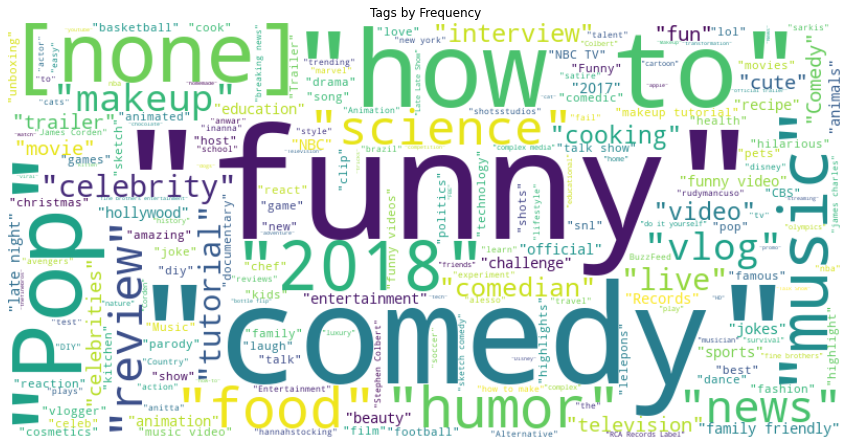

In [18]:
plt.figure(figsize=(15, 10))
plt.imshow(tag_freq_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Tags by Frequency')

Text(0.5, 1.0, 'Tags by Views')

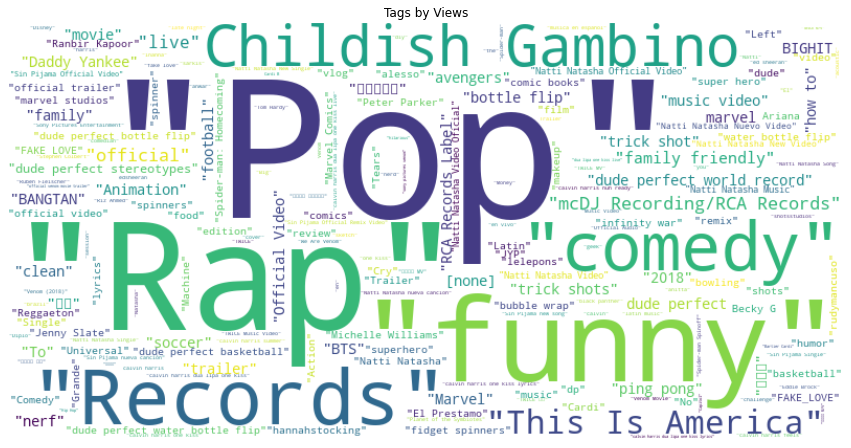

In [19]:
plt.figure(figsize=(15, 10))
plt.imshow(tag_views_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Tags by Views')

Text(0.5, 1.0, 'Titles by Frequency')

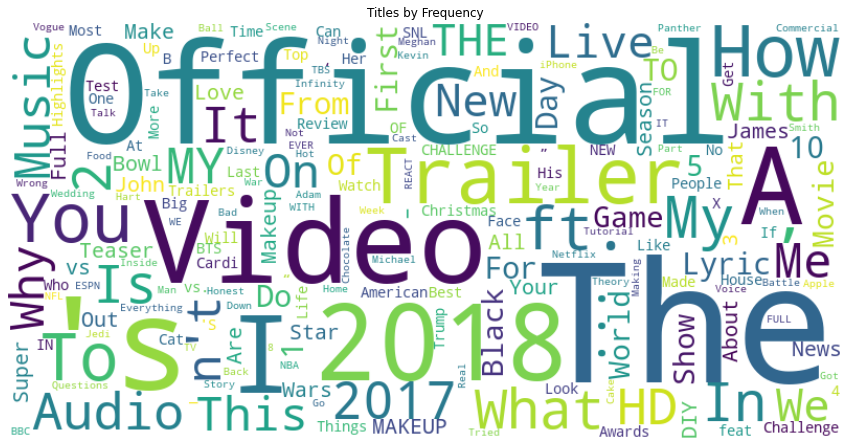

In [20]:
plt.figure(figsize=(15, 10))
plt.imshow(title_freq_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Titles by Frequency')

Text(0.5, 1.0, 'Titles by Views')

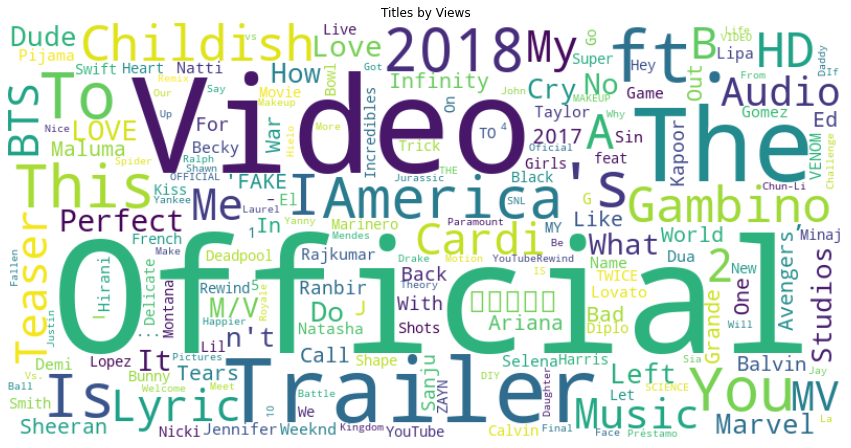

In [21]:
plt.figure(figsize=(15, 10))
plt.imshow(title_views_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Titles by Views')

**Trending Channels**

<AxesSubplot:xlabel='views', ylabel='channel_title'>

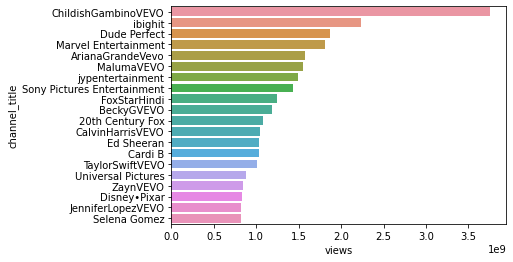

In [22]:
grouped_by_channel = vids.groupby(['channel_title']).sum().sort_values(by=['views'], ascending=False).reset_index().head(20)
sns.barplot(x="views", y="channel_title", data=grouped_by_channel)

<AxesSubplot:xlabel='video_id', ylabel='channel_title'>

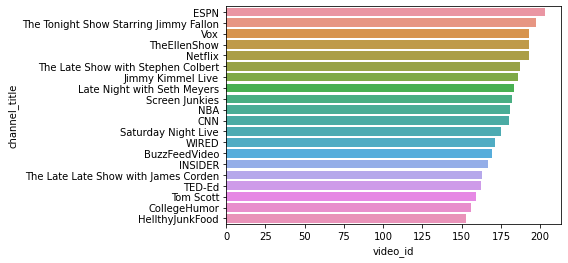

In [23]:
grouped_by_channel= vids.groupby(['channel_title']).count().sort_values(by=['video_id'], ascending=False).reset_index().head(20)
sns.barplot(x="video_id", y="channel_title", data=grouped_by_channel)